### 树回归方法

第三章使用决策树来做分类，决策树是一种**贪心算法**，它要在给定时间内做出最佳选择。第三章使用的树构建算法是ID3，该算法是每次选取当前最佳的特征来分割数据，并按照该特征的所有可能取值来切分。ID3切分迅速，但不能**直接处理连续特征**。

CART算法也是常见的树构建算法，使用**二元切分**来处理**连续型特征**。

**树回归优缺点**：

- 优点：可以对复杂和非线性的数据建模
- 缺点：结果不易理解
- 适用数据类型：数值型和标称型数据

**树回归的一般方法**：

- 收集数据：采用任意方法收集数据
- 准备数据：需要数值型数据，标称型数据应该映射成二值型数据
- 分析数据：给出数据的二维可视化显示结果，以字典方式生成树
- 训练算法：大部分时间都花费在叶节点树模型的构建上
- 测试算法：使用测试数据上的$R^{2}$值来分析模型的效果
- 使用算法：使用训练出的树做预测，预测结果还可以用来做很多事情

函数createTree()的伪代码如下：

    找到最佳的待切分特征：
        如果该节点不能再分，将该点存为叶节点
        执行二元切分
        在右子树调用createTree()方法
        在左子树调用createTree()方法

In [1]:
import regTrees

In [2]:
import numpy as np

In [3]:
reload(regTrees)

<module 'regTrees' from 'regTrees.pyc'>

In [4]:
testMat = np.mat(np.eye(4))

In [5]:
testMat

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])

In [6]:
mat0, mat1 = regTrees.binSplitDataSet(testMat, 1, 0.5)

In [7]:
mat0

matrix([[ 0.,  1.,  0.,  0.]])

In [8]:
mat1

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])

### CART算法应用于回归

为成功构建以分段常数为叶节点的树，需要度量出数据的一致性。第三种在使用ID3算法进行树分类时，会在给定节点**计算数据的混乱度**。但对于连续型数值，计算混乱度的时候采用的是**总方差**(平方误差的总值)，而不是**方差**(平方误差的均值)。

函数chooseBestSplit()的目标是找到数据集切分的最佳位置。它遍历所有特征及其可能的取值来找到使误差最小化的切分阈值。

该函数的伪代码如下：

    对每个特征：
        对每个特征值：
            将数据集切分成两份
            计算切分的误差
            如果当误差小于当前最小误差，那么将当前切分设定为最佳切分并更新最小误差
    返回最佳切分的特征和阈值

In [9]:
reload(regTrees)

<module 'regTrees' from 'regTrees.pyc'>

In [10]:
myDat = regTrees.loadDataSet('ex00.txt')

In [11]:
myMat = np.mat(myDat)

In [12]:
regTrees.createTree(myMat)

{'left': 1.0180967672413792,
 'right': -0.044650285714285719,
 'spInd': 0,
 'spVal': 0.48813}

In [13]:
import matplotlib.pyplot as plt

In [14]:
fig = plt.figure()

In [15]:
ax = fig.add_subplot(111)

In [16]:
ax.scatter(myMat[:,0].flatten().A[0], myMat[:,1].flatten().A[0], s=2, c='red')

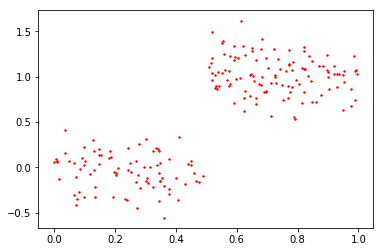

In [17]:
plt.show()

In [18]:
myDat1 = regTrees.loadDataSet('ex0.txt')

In [19]:
myMat1 = np.mat(myDat1)

In [20]:
regTrees.createTree(myMat1)

{'left': {'left': {'left': 3.9871631999999999,
   'right': 2.9836209534883724,
   'spInd': 1,
   'spVal': 0.797583},
  'right': 1.980035071428571,
  'spInd': 1,
  'spVal': 0.582002},
 'right': {'left': 1.0289583666666666,
  'right': -0.023838155555555553,
  'spInd': 1,
  'spVal': 0.197834},
 'spInd': 1,
 'spVal': 0.39435}

In [21]:
import matplotlib.pyplot as plt

In [22]:
fig = plt.figure()

In [23]:
ax = fig.add_subplot(111)

In [24]:
ax.scatter(myMat1[:,1].flatten().A[0], myMat1[:,2].flatten().A[0], s=2, c='red')

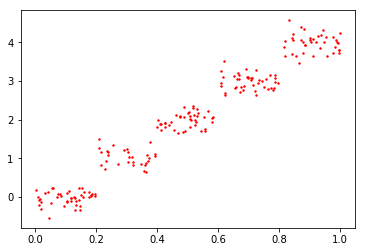

In [25]:
plt.show()

以上的两个figure都是根据一个x和y作为横纵坐标绘制的。  
书上的代码会报错，注意在以下片段的时候，将列向量转置，否则会导致最终树回归划分出的结果不正确。

    for splitVal in set(dataSet[:, featIndex].T.tolist()[0]):

### 树的剪枝

通过降低决策树的复杂度来避免过拟合的过程称为**剪枝(pruning)** 。  
函数`chooseBestSplit`中的提前终止条件，实际上是一种**预剪枝(prepruning)** 操作。  
另一种形式的剪枝需要使用测试集和训练集，称为**后剪枝(postpruning)** 。

#### 预剪枝

之前的树构建算法`createTree`对输入参数`tolS`和参数`tolN`非常敏感。  
其中，`tolS`是容许的误差下降值，`tolN`是切分的最少样本数。

In [26]:
# regTrees.createTree(myMat, ops=(0,1))建立得到的树会很臃肿，这里不展示结果了。

In [27]:
myDat2 = regTrees.loadDataSet('ex2.txt')

In [28]:
myMat2 = np.mat(myDat2)

In [29]:
# regTrees.createTree(myMat2) 这里的停止条件totS对误差的数量级非常敏感

#### 后剪枝

函数prune()的伪代码如下：

    基于已有的树切分测试数据：
        如果存在任一子集是一棵树，则在该子集递归剪枝过程
        计算将当前两个叶节点合并后的误差
        计算不合并的误差
        如何合并会降低误差的话，就将叶节点合并
        

In [30]:
reload(regTrees)

<module 'regTrees' from 'regTrees.pyc'>

In [31]:
myTree = regTrees.createTree(myMat2, ops=(0,1))

In [32]:
myDatTest = regTrees.loadDataSet('ex2test.txt')

In [33]:
myMat2Test = np.mat(myDatTest)

In [34]:
#regTrees.prune(myTree, myMat2Test)

这里进行后剪枝的时候可以发现大量节点被剪枝掉，但没有像预期那样剪枝成两部分，说明后剪枝可能不如预剪枝有效。

### 模型树

模型树没有像回归树一样，把叶子节点简单地设定为常数值，而是**把叶子节点设定为分段线性函数**。这里的**分段线性(piecewise linear)** 是指模型由多个线性片段组成。

模型树的可解释性是它优于回归树的特点之一。另外，模型树也具有更高的**预测准确度** 。

In [35]:
reload(regTrees)

<module 'regTrees' from 'regTrees.pyc'>

In [36]:
myMat2 = np.mat(regTrees.loadDataSet('exp2.txt'))

In [37]:
retTree = regTrees.createTree(myMat2, regTrees.modelLeaf, regTrees.modelErr, (1,10))

In [38]:
retTree

{'left': matrix([[  1.69855694e-03],
         [  1.19647739e+01]]), 'right': matrix([[ 3.46877936],
         [ 1.18521743]]), 'spInd': 0, 'spVal': 0.285477}

In [39]:
srtInd = myMat2[:,0].argsort(0)

In [40]:
np.shape(srtInd)

(200, 1)

In [41]:
xSort = myMat2[srtInd]

In [42]:
np.shape(xSort)

(200, 1, 2)

In [43]:
xSort = xSort[:,0,:]

In [44]:
np.shape(xSort)

(200, 2)

In [45]:
np.nonzero(xSort[:,0] <= retTree['spVal']) #分别表示两个维度满足条件的idx

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [46]:
np.nonzero(xSort[:,0] <= retTree['spVal'])[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

In [47]:
xLeftMat = xSort[np.nonzero(xSort[:,0] <= retTree['spVal'])[0],:] #和xSort[nonzero(...)[0]]效果一样，返回m*1的matrix

In [48]:
xRightMat = xSort[np.nonzero(xSort[:,0] > retTree['spVal'])[0],:]

In [49]:
type(xLeftMat[:,0].flatten().A[0])

numpy.ndarray

In [50]:
xLeft = np.mat(np.ones((np.shape(xLeftMat)[0],2)))

In [51]:
xRight = np.mat(np.ones((np.shape(xRightMat)[0],2)))

In [52]:
xLeft[:,1] = xLeftMat[:,0]

In [53]:
xRight[:,1] = xRightMat[:,0]

In [54]:
fig = plt.figure()

In [55]:
ax = fig.add_subplot(111)

In [56]:
ax.scatter(myMat2[:,0].flatten().A[0], myMat2[:,1].flatten().A[0], s=2, c='red')

In [57]:
xLeftArray = xLeftMat[:,0].flatten().A[0] 

In [58]:
#有个疑问：为什么是xLeft与retTree['right']进行矩阵乘法？
#原因是在binSplitDataSet函数中，对feature进行分类时，<=的子集被归到了mat1里，即rSet

In [59]:
ax.plot(xLeftArray, (xLeft * retTree['right']).flatten().A[0], c='blue')

In [60]:
xRightArray = xRightMat[:,0].flatten().A[0]

In [61]:
ax.plot(xRightArray, (xRight * retTree['left']).flatten().A[0], c='black')

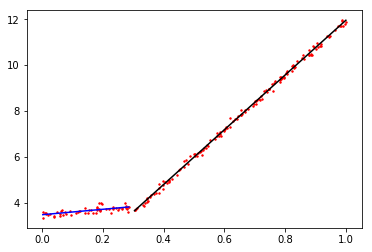

In [62]:
plt.show()

### 树回归与标准回归的比较

比较模型树和回归树哪种模型更好的一个比较客观的方法是：**计算相关系数** ，也称为$R^{2}$值。该相关系数可以通过调用numpy库中的命令corrcoef(yHat, y, rowvar=0)来求解，其中yHat是预测值，y是目标变量的实际值。

In [63]:
reload(regTrees)

<module 'regTrees' from 'regTrees.pyc'>

In [64]:
trainMat = np.mat(regTrees.loadDataSet('bikeSpeedVsIq_train.txt'))

In [65]:
testMat = np.mat(regTrees.loadDataSet('bikeSpeedVsIq_test.txt'))

In [66]:
myTree = regTrees.createTree(trainMat, ops=(1,20))

In [67]:
yHat = regTrees.createForeCast(myTree, testMat[:,0])

In [68]:
np.corrcoef(yHat, testMat[:,1], rowvar=0)[0, 1]

0.96408523182221439

$R^{2}$越接近1越好，这里可以看出模型树的结果比回归树要好。

In [69]:
ws, X, Y = regTrees.linearSolve(trainMat)

In [70]:
ws

matrix([[ 37.58916794],
        [  6.18978355]])

In [71]:
for i in range(np.shape(testMat)[0]):
    yHat[i] = testMat[i,0]*ws[1,0] + ws[0,0]

In [72]:
np.corrcoef(yHat, testMat[:,1], rowvar=0)[0, 1]

0.94346842356747618

可以看出，该标准的线性回归方法在$R^{2}$值上的表现不如上面的两种树回归方法。所以树回归方法在预测复杂数据时会比简单的线性回归模型更加有效。

### 使用Python的Tkinter库创建GUI

示例：利用GUI对回归树调优

- 收集数据：所提供的文本文件
- 准备数据：用Python解析上述文件，得到数值型数据
- 分析数据：用Tkinter构建一个GUI来展示模型和数据
- 训练数据：训练一棵回归树和一棵模型树，并与数据集一起展示出来
- 测试算法：这里不需要测试过程
- 使用算法：GUI使得人们可以在预剪枝时测试不同参数的影响，还可以帮助我们选择模型的类型

In [73]:
from Tkinter import *

In [74]:
root = Tk()

In [75]:
myLabel = Label(root, text='Hello world')

In [76]:
myLabel.grid() #会将label的位置告诉布局管理器(Geometry Manager)，默认显示在0行0列

In [ ]:
root.mainloop()

Tkinter的GUI由一些小部件(Widget)组成。所谓小部件，指的是文本框(Text Box)、按钮(Button)、标签(Label)和复选按钮(Check Button)等对象。

In [ ]:
%run treeExplore.py

d:\software\python\python27\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


当选择regTree的时候，tolN=1，tolS=0时，拟合的效果最好